## 1. Facebook network
***
In this project, we will be using the dataset given below:

http://snap.stanford.edu/data/egonets-Facebook.html

The Facebook network can be created from the edgelist file (facebook combined.txt)

### Packages
***

In [3]:
library(igraph)
library(pracma)

### 1. Structural properties of the Facebook network
***
Having created the Facebook network, we will study some of the structural properties of the network. To be specific, we will study
+ Connectivity
+ Degree distribution

### QUESTION 1: A first look at the network:
***
#### QUESTION 1.1: Report the number of nodes and number of edges of the Facebook network.
> Ans:

In [5]:
edges <- read.table("data/facebook_combined.txt")
g <- graph.data.frame(edges, directed=FALSE)
fprintf("Number of nodes: %d\n", gorder(g))
fprintf("Number of edges: %d", gsize(g))

Number of nodes: 4039
Number of edges: 88234

#### QUESTION 1.2: Is the Facebook network connected? If not, find the giant connected component (GCC) of the network and report the size of the GCC.
> Ans:

In [6]:
is.connected(g)

[1] TRUE

#### QUESTION 2: Find the diameter of the network. If the network is not connected, then find the diameter of the GCC.
> Ans: 

In [7]:
diameter(g)

[1] 8

#### QUESTION 3: Plot the degree distribution of the facebook network and report the average degree.
> Ans: 

mean=43.691

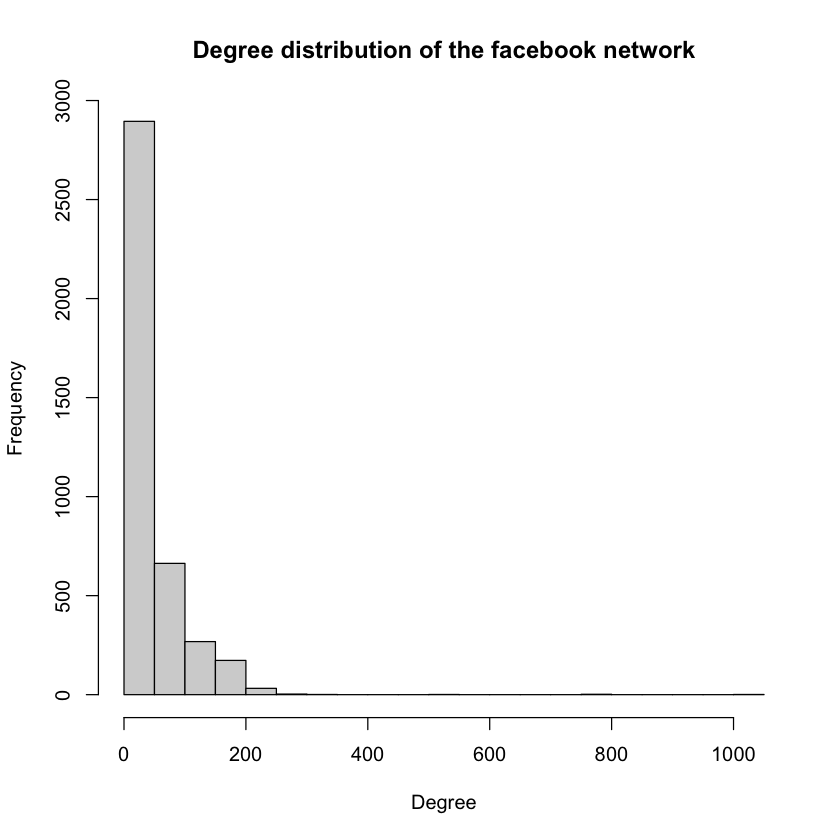

In [11]:
hist(
    degree(g),
    main="Degree distribution of the facebook network",
    xlab="Degree",
    ylab="Frequency",
    breaks=30,
)
fprintf("mean=%.3f", mean(degree(g)))

#### QUESTION 4: Plot the degree distribution of Question 3 in a log-log scale. Try to fit a line to the plot and estimate the slope of the line.
> Ans: 

Slope: -1.248

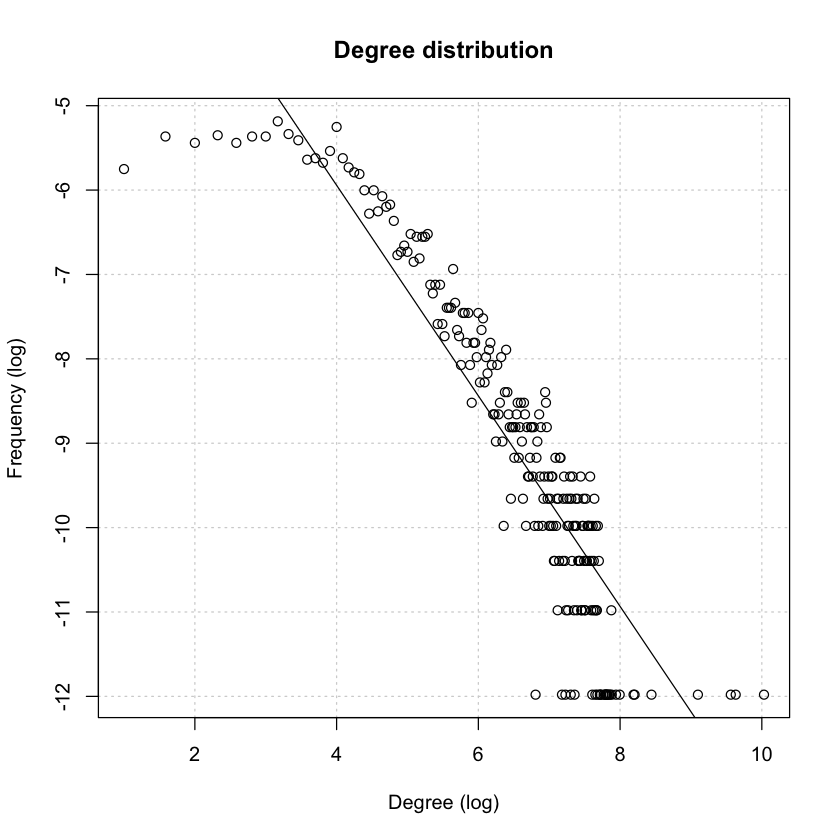

In [23]:
plot_degree_distribution <- function(g) {
    deg_dist <- degree.distribution(g)
    non_zero_idxs <- which(deg_dist != 0, arr.ind=TRUE)
    x <- log2(c(1: length(deg_dist)))[non_zero_idxs]
    y <- log2(deg_dist)[non_zero_idxs]
    plot(
        x,
        y,
        main="Degree distribution",
        xlab="Degree (log)",
        ylab="Frequency (log)",
        grid(),
    )
    linear_model <- lm(y ~ x)
    abline(linear_model)
    fprintf("Slope: %.3f", coef(linear_model)[2])
}


plot_degree_distribution(g)

### 2. Personalized network
***
A personalized network of an user vi is defined as the subgraph induced by vi and it’s neighbors. In this part, we will study some of the structural properties of the personalized network of the user whose graph node ID is 1 (node ID in edgelist is 0). From this point onwards, whenever we are refering to a node ID we mean the graph node ID which is 1 + node ID in edgelist.

#### QUESTION 5: Create a personalized network of the user whose ID is 1. How many nodes and edges does this personalized network have?

Hint Useful function(s): makeegograph

> Ans:

In [24]:
g_ego <- make_ego_graph(g, order=1, nodes=V(g), mindist=0)[[1]]
fprintf("Number of nodes: %d\n", gorder(g_ego))
fprintf("Number of edges: %d", gsize(g_ego))

Number of nodes: 348
Number of edges: 2866

#### QUESTION 6: What is the diameter of the personalized network? Please state a trivial upper and lower bound for the diameter of the personalized network.
> Ans: 

In [25]:
diameter(g_ego)

[1] 2

#### QUESTION 7: In the context of the personalized network, what is the meaning of the diameter of the personalized network to be equal to the upper bound you derived in Question 6. What is the meaning of the diameter of the personalized network to be equal to the lower bound you derived in Question 6 (assuming there are more than 3 nodes in the personalized network)?
> Ans:

### 3. Core node’s personalized network
***
A core node is defined as the nodes that have more than 200 neighbors. In this part, we will study various properties of the personalized network of the core nodes.

#### QUESTION 8: How many core nodes are there in the Facebook network. What is the average degree of the core nodes?
> Ans: 

In [27]:
core_nodes <- which(neighborhood.size(g, 1, nodes=V(g)) > 200)
fprintf("Number of core nodes: %d\n", length(core_nodes))
fprintf("Average degree of the core nodes: %.3f", mean(degree(g, v=V(g)[core_nodes])))

Number of core nodes: 41
Average degree of the core nodes: 277.439

### 3.1. Community structure of core node’s personalized network
***
In this part, we study the community structure of the core node’s personalized network. To be specific, we will study the community structure of the personalized network of the following core nodes:
+ Node ID 1
+ Node ID 108
+ Node ID 349
+ Node ID 484
+ Node ID 1087

#### QUESTION 9: For each of the above core node’s personalized network, find the community structure using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare the modularity scores of the algorithms. For visualization purpose, display the community structure of the core node’s personalized networks using colors. Nodes belonging to the same community should have the same color and nodes belonging to different communities should have different color. In this question, you should have 15 plots in total.

Hint Useful function(s): clusterfastgreedy , clusteredgebetweenness , clusterinfomap

> Ans:

### 3.2. Community structure with the core node removed
***
In this part, we will explore the effect on the community structure of a core node’s personalized network when the core node itself is removed from the personalized network.

#### QUESTION 10: For each of the core node’s personalized network (use same core nodes as Question 9, remove the core node from the personalized network and find the community structure of the modified personalized network. Use the same community detection algorithm as Question 9. Compare the modularity score of the community structure of the modified personalized network with the modularity score of the community structure of the personalized network of Question 9. For visualization purpose, display the community structure of the modified personalized network using colors. In this question, you should have 15 plots in total.
> Ans:

### 3.3. Characteristic of nodes in the personalized network
***
In this part, we will explore characteristics of nodes in the personalized network using two measures. These two measures are stated and defined below:
+ **Embeddedness** of a node is defined as the number of mutual friends a node shares with the core node.
+ **Dispersion** of a node is defined as the sum of distances between every pair of the mutual friends the node shares with the core node. The distances should be calculated in a modified graph where the node (whose dispersion is being computed) and the core node are removed.
For further details on the above characteristics, you can read the paper below:

http://arxiv.org/abs/1310.6753

#### QUESTION 11: Write an expression relating the Embeddedness between the core node and a non-core node to the degree of the non-core node in the personalized network of the core node.
> Ans:

#### QUESTION 12: For each of the core node’s personalized network (use the same core nodes as Question 9, plot the distribution histogram of embeddedness and dispersion. In this question, you will have 10 plots.

Hint Useful function(s): neighbors , intersection , distances

> Ans:

#### QUESTION 13: For each of the core node’s personalized network, plot the community structure of the personalized network using colors and highlight the node with maximum dispersion. Also, highlight the edges incident to this node. To detect the community structure, use Fast-Greedy algorithm. In this question, you will have 5 plots.
> Ans: 

#### QUESTION 14: Repeat Question 13, but now highlight the node with maximum embeddedness and the node with maximum dispersion embeddedness (excluding the nodes having zero embeddedness if there are any). Also, highlight the edges incident to these nodes. Report the id of those nodes.

> Ans:

#### QUESTION 15: Use the plots from Question 13 and 14 to explain the characteristics of a node revealed by each of this measure.
> Ans: 

### 4. Friend recommendation in personalized networks
***
In many social networks, it is desirable to predict future links between pairs of nodes in the network. In the context of this Facebook network it is equivalent to recommending friends to users. In this part of the project, we will explore some neighborhood-based measures for friend recommendation. The network that we will be using for this part is the personalized network of node with ID 415.

### 4.1. Neighborhood based measure
***
In this project, we will be exploring three different neighborhood-based measures. Before we define these measures, let’s introduce some notation:
+ Si is the neighbor set of node i in the network
+ Sj is the neighbor set of node j in the network

Then, with the above notation we define the three measures below:
+ Common neighbor measure between node i and node j is defined as Common Neighbors(i, j) = |Si ∩ Sj|
+ Jaccard measure between node i and node j is defined as Jaccard(i, j) = |Si ∩ Sj | / |Si ∪ Sj|
+ Adamic-Adar measure between node i and node j is defined as Adamic Adar(i, j) = $\sum_{k∈S_i∩S_j}1/\log|S_k|$

### 4.2. Friend recommendation using neighborhood based measures
***
We can use the neighborhood based measures defined in the previous section to recommend new friends to users in the network. Suppose we want to recommend t new friends to some user i in the network using Jaccard measure. We follow the steps listed below:

1. For each node in the network that is not a neighbor of i, compute the jaccard measure between the node i and the node not in the neighborhood of i Compute Jaccard(i, j) $∀j ∈ S_i^C$

2. Then pick t nodes that have the highest Jaccard measure with node i and recommend these nodes as friends to node i

### 4.3. Creating the list of users
***
Having defined the friend recommendation procedure, we can now apply it to the personalized network of node ID 415. Before we apply the algorithm, we need to create the list of users who we want to recommend new friends to. We create this list by picking all nodes with degree 24. We will denote this list as Nr.

#### QUESTION 16: What is |Nr|, i.e. the length of the list Nr?
> Ans: 

### 4.4. Average accuracy of friend recommendation algorithm
***
In this part, we will apply the 3 different types of friend recommendation algorithms to recommend friends to the users in the list Nr. We will define an average accuracy measure to compare the performances of the friend recommendation algorithms.

Suppose we want to compute the average accuracy of the friend recommendation algorithm. This task is completed in two steps:

1. Compute the average accuracy for each user in the list Nr

2. Compute the average accuracy of the algorithm by averaging across the accuracies of the users in the list Nr

Let’s describe the procedure for accomplishing the step 1 of the task. Suppose we want to compute the average accuracy for user i in the list Nr. We can compute it by iterating over the following steps 10 times and then taking the average:

1. Remove each edge of node i at random with probability 0.25. In this context, it is equivalent to deleting some friends of node i. Let’s denote the list of friends deleted as Ri

2. Use one of the three neighborhood based measures to recommend |Ri| new friends to the user i. Let’s denote the list of friends recommended as Pi

3. The accuracy for the user i for this iteration is given by |Pi∩Ri| / |Ri|

By iterating over the above steps for 10 times and then taking the average gives us the average accuracy of user i. In this manner, we compute the average accuracy for each user in the list Nr. Once we have computed them, then we can take the mean of the average accuracies of the users in the list Nr. The mean value will be the average accuracy of the friend recommendation algorithm.

#### QUESTION 17: Compute the average accuracy of the friend recommendation algorithm that uses:
+ Common Neighbors measure
+ Jaccard measure
+ Adamic Adar measure
#### Based on the average accuracy values, which friend recommendation algorithm is the best?

Hint Useful function(s): similarity

> Ans: